### dataset info

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframed = pd.read_csv('data/water_potability.csv');
dataframed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
print(dataframed.shape)

(3276, 10)


In [4]:
dataframed.columns.values.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [5]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
dataframed.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
dataframed.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
dataframed.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### missing values

In [9]:
# ph
print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 1 and Hardness > 150
PH VALUE : 7.1125


In [10]:
for x in range(0, len(dataframed)) :
    if (pd.isnull(dataframed['ph'][x]) == True) :
        if ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] <= 150)) : dataframed['ph'][x] = condition_1_mean_ph
        elif ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] > 150)) : dataframed['ph'][x] = condition_2_mean_ph
        elif ((dataframed['Potability'][x] == 1) & (dataframed['Hardness'][x] <= 150)) : dataframed['ph'][x] = condition_3_mean_ph
        elif ((dataframed['Potability'][x] == 1) & (dataframed['Hardness'][x] > 150)) : dataframed['ph'][x] = condition_4_mean_ph

In [11]:
# Sulfate
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = dataframed[(dataframed['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = dataframed[(dataframed['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [12]:
for x in range(0, len(dataframed)) :
    if (pd.isnull(dataframed['Sulfate'][x]) == True) :
        if (dataframed['Potability'][x] == 0) : dataframed['Sulfate'][x] = condition_1_mean_sulfate
        else : dataframed['Sulfate'][x] = condition_2_mean_sulfate
              

In [13]:
# Trihalomethanes
print('Conditonal Statements to fill in the Missing Values of Trihalomethanes Column')

print("\n")
print('if Potability = 0')
condition_1_mean_trihalomethanes = dataframed[(dataframed['Potability'] == 0)][['Trihalomethanes']].mean()
print("Trihalomethanes : {:.4f}".format(float(condition_1_mean_trihalomethanes)))

print("\n")
print('if Potability = 1')
condition_2_mean_trihalomethanes = dataframed[(dataframed['Potability'] == 1)][['Trihalomethanes']].mean()
print("Trihalomethanes : {:.4f}".format(float(condition_2_mean_trihalomethanes)))

Conditonal Statements to fill in the Missing Values of Trihalomethanes Column


if Potability = 0
Trihalomethanes : 66.3036


if Potability = 1
Trihalomethanes : 66.5397


In [14]:
for x in range(0, len(dataframed)) :
    if (pd.isnull(dataframed['Trihalomethanes'][x]) == True) :
        if (dataframed['Potability'][x] == 0) : dataframed['Trihalomethanes'][x] = condition_1_mean_trihalomethanes
        else : dataframed['Trihalomethanes'][x] = condition_2_mean_trihalomethanes

In [15]:
# distribution of values
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
print("The Range of Values among different 10 columns\n")

print("Ph : {:.4f}".format(min(dataframed['ph'])) + " - {:.4f}".format(max(dataframed['ph'])))
print('\n')
print("Hardness : {:.4f}".format(min(dataframed['Hardness'])) + " - {:.4f}".format(max(dataframed['Hardness'])))
print('\n')
print("Solids : {:.4f}".format(min(dataframed['Solids'])) + " - {:.4f}".format(max(dataframed['Solids'])))
print('\n')
print("Chloramines : {:.4f}".format(min(dataframed['Chloramines'])) + " - {:.4f}".format(max(dataframed['Chloramines'])))
print('\n')
print("Sulfate : {:.4f}".format(min(dataframed['Sulfate'])) + " - {:.4f}".format(max(dataframed['Sulfate'])))
print('\n')
print("Conductivity : {:.4f}".format(min(dataframed['Conductivity'])) + " - {:.4f}".format(max(dataframed['Conductivity'])))
print('\n')
print("Organic Carbon : {:.4f}".format(min(dataframed['Organic_carbon'])) + " - {:.4f}".format(max(dataframed['Organic_carbon'])))
print('\n')
print("Trihalomethanes : {:.4f}".format(min(dataframed['Trihalomethanes'])) + " - {:.4f}".format(max(dataframed['Trihalomethanes'])))
print('\n')
print("Turbidity : {:.4f}".format(min(dataframed['Turbidity'])) + " - {:.4f}".format(max(dataframed['Turbidity'])))
print('\n')
print("Potability : {:.4f}".format(min(dataframed['Potability'])) + " - {:.4f}".format(max(dataframed['Potability'])))

The Range of Values among different 10 columns

Ph : 0.0000 - 14.0000


Hardness : 47.4320 - 323.1240


Solids : 320.9426 - 61227.1960


Chloramines : 0.3520 - 13.1270


Sulfate : 129.0000 - 481.0306


Conductivity : 181.4838 - 753.3426


Organic Carbon : 2.2000 - 28.3000


Trihalomethanes : 0.7380 - 124.0000


Turbidity : 1.4500 - 6.7390


Potability : 0.0000 - 1.0000


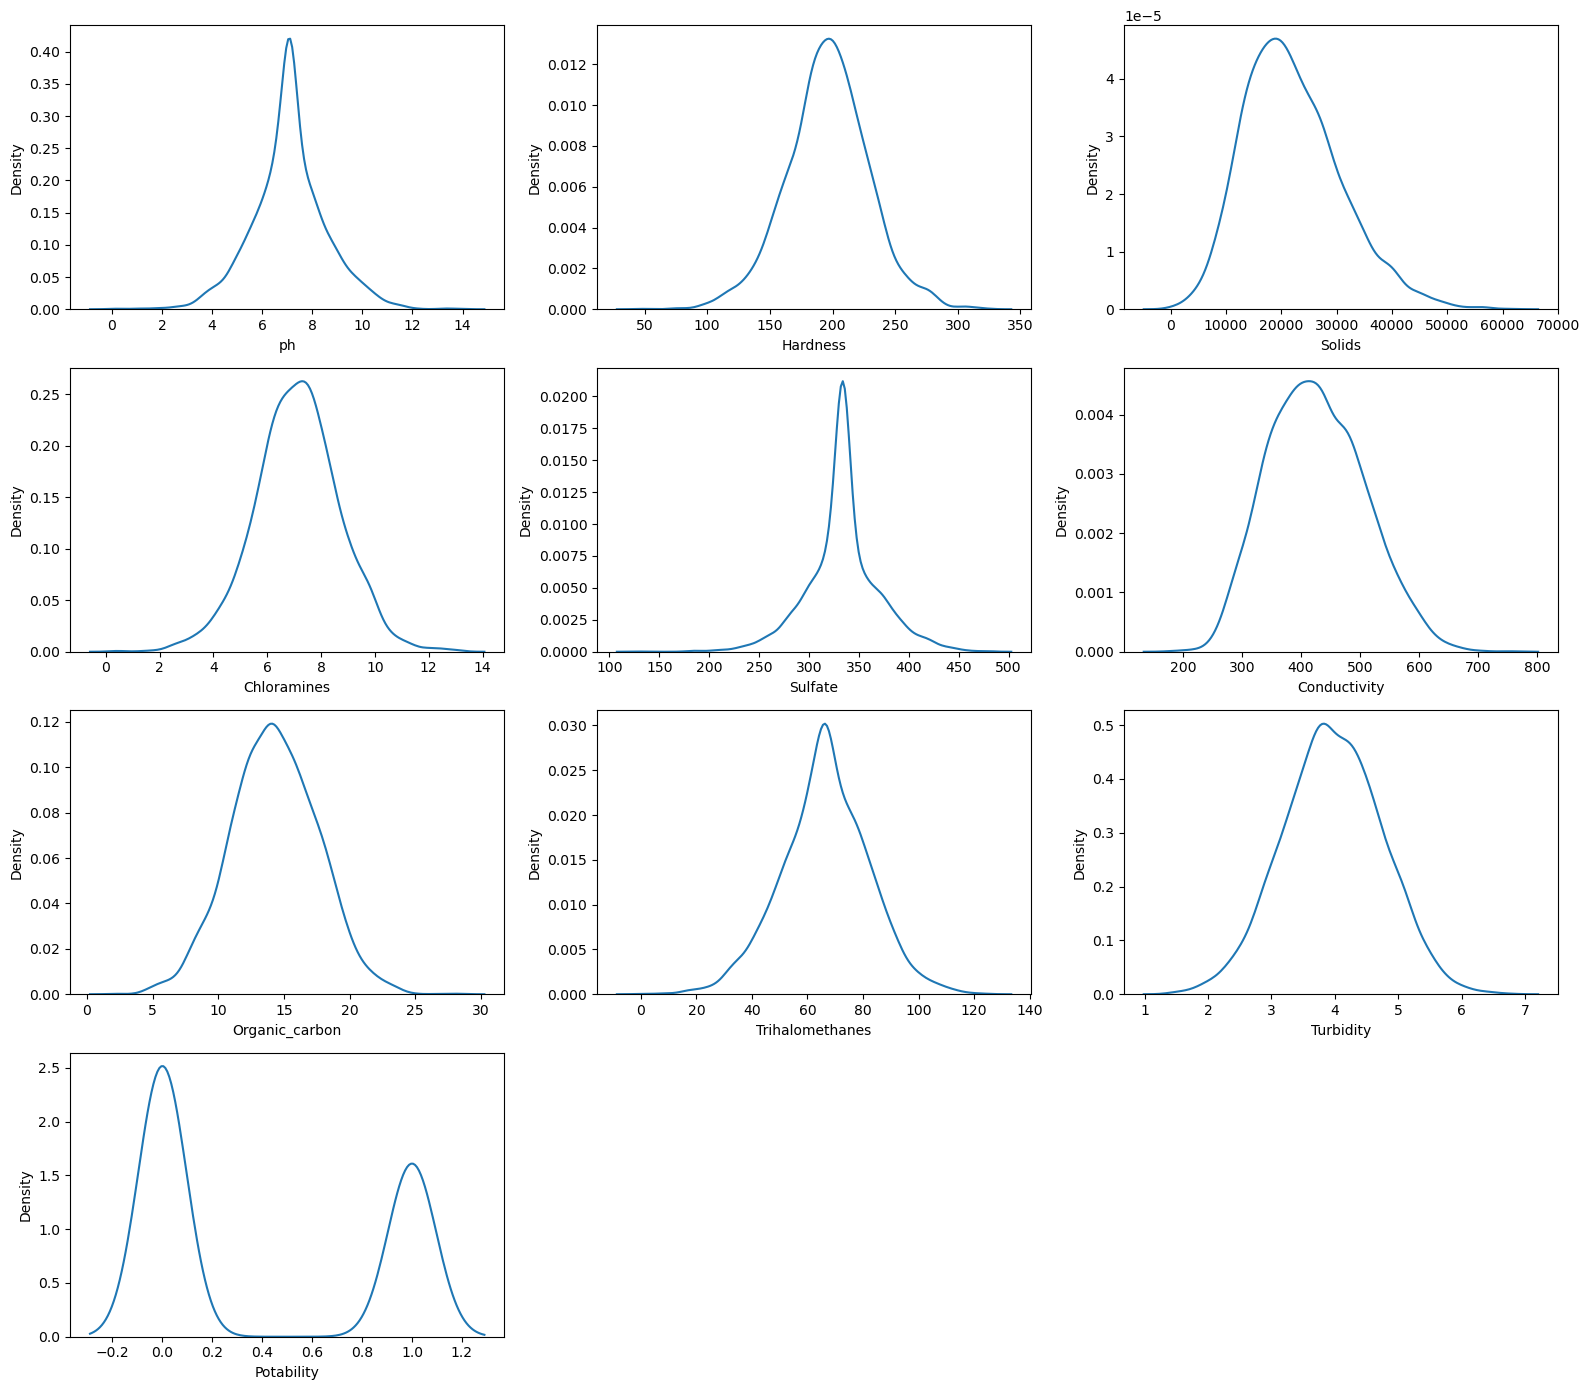

In [17]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=dataframed[col])
    plt.tight_layout()

[Text(0.5, 56.016874999999985, 'Pearson Correlation Coefficient Heatmap')]

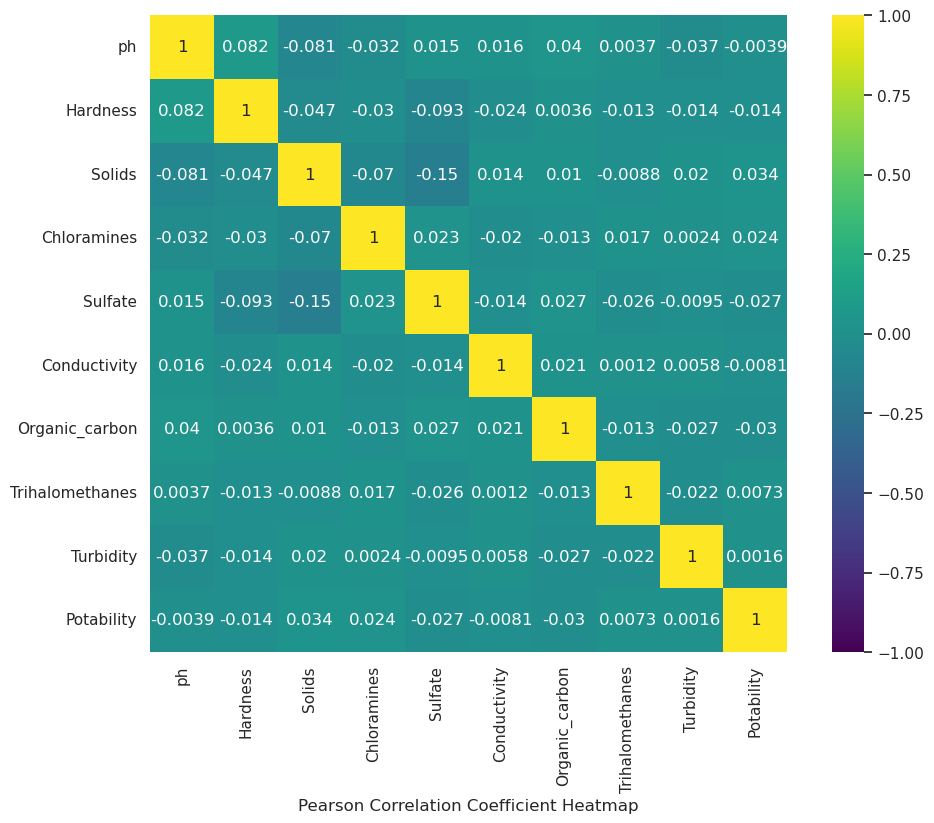

In [18]:
# pearson correlation coefficient
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heated = sns.heatmap(dataframed.corr("pearson"),vmin=-1, vmax=1,cmap='viridis',annot=True, square=True)
Heated.set(xlabel = "Pearson Correlation Coefficient Heatmap")

### define X

* PH VALUE
* HARDNESS
* SOLIDS
* CHLORAMINES
* SULFATE
* CONDUCTIVITY
* ORGANIC_CARBON
* TRIHALOMETHANES
* TURBIDITY

In [19]:
X = dataframed.iloc[:, :-1]
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.112512,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


### define y

* POTABILITY

In [20]:
y = dataframed.iloc[:, -1:]
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


### oversampling

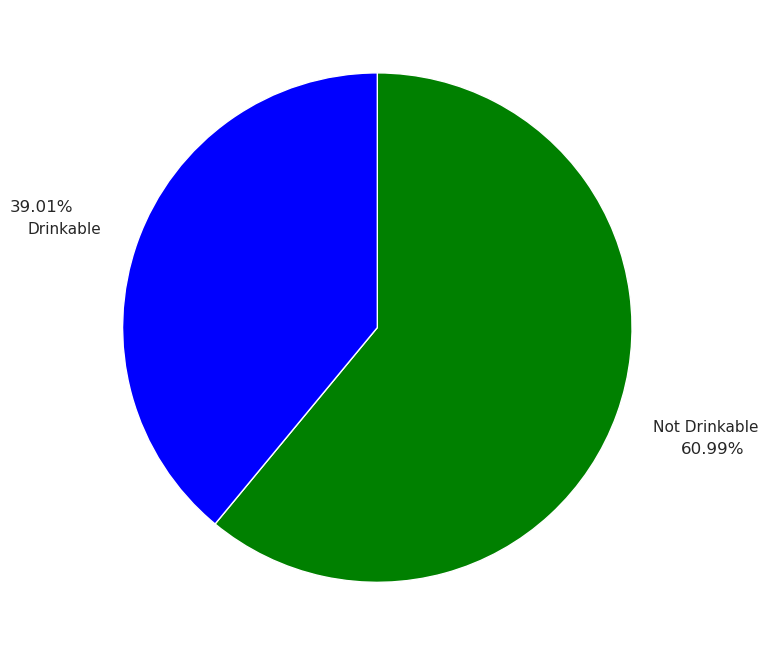

In [21]:
plt.pie(dataframed['Potability'].value_counts(),labels=['Not Drinkable','Drinkable'],colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=1.4,startangle=90,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy = 1)
X_res_over, y_res_over = rus.fit_resample(X, y)

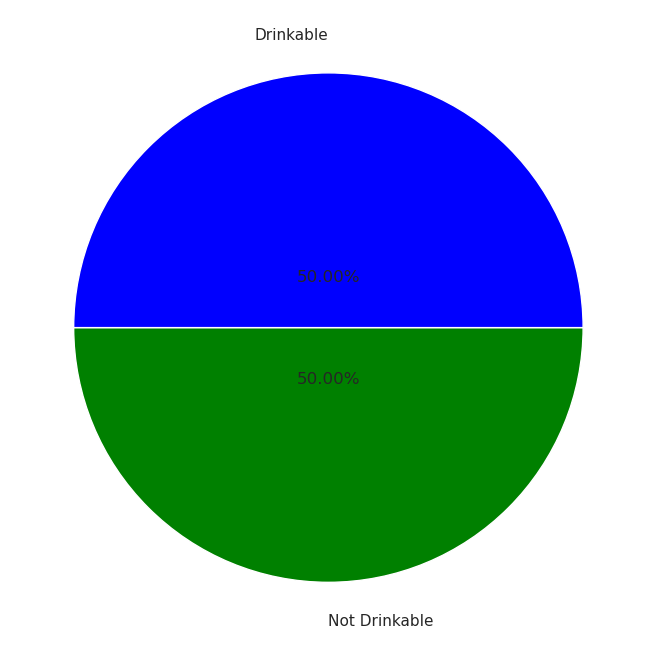

In [23]:
plt.pie(y_res_over['Potability'].value_counts(),labels=['Not Drinkable','Drinkable'],
        colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=0.2,startangle=0,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.show()

### train & test

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state = 42)

In [26]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (3196, 9)
y_train shape :  (3196, 1)
X_test shape :  (800, 9)
y_test shape :  (800, 1)


In [35]:
from sklearn.ensemble import RandomForestClassifier

#base model
base = RandomForestClassifier()
base.fit(X_train, y_train.values.ravel())
base_pred = base.predict(X_test) 

In [36]:
print(classification_report(y_test, base_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8556    0.8122    0.8333       394
           1     0.8263    0.8670    0.8462       406

    accuracy                         0.8400       800
   macro avg     0.8410    0.8396    0.8397       800
weighted avg     0.8407    0.8400    0.8398       800



In [37]:
# search hyperparams
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
grid = {
    'n_estimators': list(range(10, 100, 10)),
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'max_features': list(range(1, X_res_over.shape[1] + 1)),
    'min_samples_leaf': list(range(1, 10))
}
clf = RandomizedSearchCV(base, grid, random_state=42)
search = clf.fit(X_res_over, y_res_over)
search.best_params_

{'n_estimators': 40, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': 40}

In [45]:
from sklearn.ensemble import RandomForestClassifier

# result model
model = RandomForestClassifier(n_estimators=40, max_depth=40, min_samples_leaf=1, max_features=1)
model.fit(X_train, y_train.values.ravel())
model_pred = model.predict(X_test) 

In [46]:
print(classification_report(y_test, model_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8417    0.8503    0.8460       394
           1     0.8532    0.8448    0.8490       406

    accuracy                         0.8475       800
   macro avg     0.8475    0.8475    0.8475       800
weighted avg     0.8476    0.8475    0.8475       800

